In [1]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Import data and creat DataFrame

file_path = 'Resources/fastfood.csv'
fast_food_df = pd.read_csv(file_path)

fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
# CLEAN DATA
# Update the 'salad' column to True if the substring 'salad' exists in the 'item' column
fast_food_df['salad'] = fast_food_df['item'].str.contains("salad", case=False)

# Drop kids menu items - dropped 4 items 
kids_index = fast_food_df[fast_food_df['item'].str.contains("kids", case=False)].index
fast_food_df = fast_food_df.drop(kids_index)

# Drop 'vit_a', 'vit_c', 'calcium' columns
fast_food_df = fast_food_df[['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'salad']]

fast_food_df = fast_food_df.reset_index(drop=True)
fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False


In [4]:
# List and organize into desired columns 
fast_food_df.columns
fast_food_df_sorted = fast_food_df[["restaurant", "item","calories", "total_fat", "sugar","sodium","protein"]]
fast_food_df_sorted.head()

,restaurant,item,calories,total_fat,sugar,sodium,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,11,1110,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,18,1580,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,18,1920,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,18,1940,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,18,1980,46.0


In [5]:
# Sort by Restaurant Mins
fast_food_df_mins = fast_food_df_sorted.groupby('restaurant').min()
fast_food_df_mins

,item,calories,total_fat,sugar,sodium,protein
restaurant,,,,,,
Arbys,2 piece Prime-Cut Chicken Tenders,70,5,0,100,5.0
Burger King,20 Piece Chicken Nuggets,190,10,0,310,5.0
Chick Fil-A,1 Piece Chick-n-Strips,70,2,0,220,11.0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,20,0,0,15,1.0
Mcdonalds,10 Piece Chicken McNuggets,140,5,0,20,7.0
Sonic,3 Piece Crispy Chicken Tender Dinner,100,11,0,470,6.0
Subway,"6"" B.L.T.",50,1,3,65,3.0
Taco Bell,1/2 lb.* Cheesy Potato Burrito,140,4,1,290,6.0


In [6]:
# Group by Restaurant Maxes
fast_food_df_max = fast_food_df_sorted.groupby('restaurant').max()
fast_food_df_max


,item,calories,total_fat,sugar,sodium,protein
restaurant,,,,,,
Arbys,Ultimate BLT,1030,59,23,3350,62.0
Burger King,WHOPPER w/o Cheese,1550,126,37,2310,134.0
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,970,47,12,3660,103.0
Dairy Queen,Turkey BLT Sandwich,1260,75,30,3500,49.0
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,2430,141,87,6080,186.0
Sonic,Veggie Burger With Mustard,1350,100,17,4520,67.0
Subway,Veggie Delite Salad,1160,62,36,3540,78.0
Taco Bell,XXL Grilled Stuft Burrito - Steak,880,42,8,2260,37.0


In [7]:
# Sorting Max Calories 
max_cal = fast_food_df_max.sort_values(by=['calories'])
max_cal = fast_food_df_max[['item','calories']]
max_cal


,item,calories
restaurant,,
Arbys,Ultimate BLT,1030
Burger King,WHOPPER w/o Cheese,1550
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,970
Dairy Queen,Turkey BLT Sandwich,1260
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,2430
Sonic,Veggie Burger With Mustard,1350
Subway,Veggie Delite Salad,1160
Taco Bell,XXL Grilled Stuft Burrito - Steak,880


In [8]:
# Sorting by Max Sugar
max_sug = fast_food_df_max.sort_values(by=['sugar'])
max_sug = fast_food_df_max[['item','sugar']]
max_sug

,item,sugar
restaurant,,
Arbys,Ultimate BLT,23
Burger King,WHOPPER w/o Cheese,37
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,12
Dairy Queen,Turkey BLT Sandwich,30
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,87
Sonic,Veggie Burger With Mustard,17
Subway,Veggie Delite Salad,36
Taco Bell,XXL Grilled Stuft Burrito - Steak,8


In [9]:
# Sorting by Max Sodium 
max_sod = fast_food_df_max.sort_values(by=['sodium'])
max_sod = fast_food_df_max[['item','sodium']]
max_sod


,item,sodium
restaurant,,
Arbys,Ultimate BLT,3350
Burger King,WHOPPER w/o Cheese,2310
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,3660
Dairy Queen,Turkey BLT Sandwich,3500
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,6080
Sonic,Veggie Burger With Mustard,4520
Subway,Veggie Delite Salad,3540
Taco Bell,XXL Grilled Stuft Burrito - Steak,2260


In [10]:
# Sorting by Max Fat
max_fat = fast_food_df_max.sort_values(by=['total_fat'])
max_fat = fast_food_df_max[['item','total_fat']]
max_fat


,item,total_fat
restaurant,,
Arbys,Ultimate BLT,59
Burger King,WHOPPER w/o Cheese,126
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,47
Dairy Queen,Turkey BLT Sandwich,75
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,141
Sonic,Veggie Burger With Mustard,100
Subway,Veggie Delite Salad,62
Taco Bell,XXL Grilled Stuft Burrito - Steak,42


In [11]:
# Sorting by Max Protein 
max_prot = fast_food_df_max.sort_values(by=['protein'])
max_prot = fast_food_df_max[['item','protein']]
max_prot

,item,protein
restaurant,,
Arbys,Ultimate BLT,62.0
Burger King,WHOPPER w/o Cheese,134.0
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,103.0
Dairy Queen,Turkey BLT Sandwich,49.0
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,186.0
Sonic,Veggie Burger With Mustard,67.0
Subway,Veggie Delite Salad,78.0
Taco Bell,XXL Grilled Stuft Burrito - Steak,37.0


In [12]:
# Group by Restaurant Mins
fast_food_df_mins = fast_food_df_sorted.groupby('restaurant').min()
fast_food_df_mins

# Sorting by Min Calories
min_cal = fast_food_df_mins.sort_values(by=['calories'])
min_cal = fast_food_df_mins[['item','calories']]
min_cal

,item,calories
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,70
Burger King,20 Piece Chicken Nuggets,190
Chick Fil-A,1 Piece Chick-n-Strips,70
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,20
Mcdonalds,10 Piece Chicken McNuggets,140
Sonic,3 Piece Crispy Chicken Tender Dinner,100
Subway,"6"" B.L.T.",50
Taco Bell,1/2 lb.* Cheesy Potato Burrito,140


In [13]:
# Sorting by Min Sugar
min_sug = fast_food_df_mins.sort_values(by=['sugar'])
min_sug = fast_food_df_mins[['item','sugar']]
min_sug

,item,sugar
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,0
Burger King,20 Piece Chicken Nuggets,0
Chick Fil-A,1 Piece Chick-n-Strips,0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,0
Mcdonalds,10 Piece Chicken McNuggets,0
Sonic,3 Piece Crispy Chicken Tender Dinner,0
Subway,"6"" B.L.T.",3
Taco Bell,1/2 lb.* Cheesy Potato Burrito,1


In [14]:
# Sorting by Min Sodium 
min_sod = fast_food_df_mins.sort_values(by=['sodium'])
min_sod = fast_food_df_mins[['item','sodium']]
min_sod


,item,sodium
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,100
Burger King,20 Piece Chicken Nuggets,310
Chick Fil-A,1 Piece Chick-n-Strips,220
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,15
Mcdonalds,10 Piece Chicken McNuggets,20
Sonic,3 Piece Crispy Chicken Tender Dinner,470
Subway,"6"" B.L.T.",65
Taco Bell,1/2 lb.* Cheesy Potato Burrito,290


In [15]:
# Sorting by Min Fat
min_fat = fast_food_df_mins.sort_values(by=['total_fat'])
min_fat = fast_food_df_mins[['item','total_fat']]
min_fat



,item,total_fat
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,5
Burger King,20 Piece Chicken Nuggets,10
Chick Fil-A,1 Piece Chick-n-Strips,2
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,0
Mcdonalds,10 Piece Chicken McNuggets,5
Sonic,3 Piece Crispy Chicken Tender Dinner,11
Subway,"6"" B.L.T.",1
Taco Bell,1/2 lb.* Cheesy Potato Burrito,4


In [16]:
# Sorting by Min Protein 
min_prot = fast_food_df_mins.sort_values(by=['protein'])
min_prot = fast_food_df_mins[['item','protein']]
min_prot

,item,protein
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,5.0
Burger King,20 Piece Chicken Nuggets,5.0
Chick Fil-A,1 Piece Chick-n-Strips,11.0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,1.0
Mcdonalds,10 Piece Chicken McNuggets,7.0
Sonic,3 Piece Crispy Chicken Tender Dinner,6.0
Subway,"6"" B.L.T.",3.0
Taco Bell,1/2 lb.* Cheesy Potato Burrito,6.0


In [17]:
# Sorting by averages 
avg_df = fast_food_df_sorted.groupby(['restaurant'])['calories', 'sugar', 'sodium', 'total_fat', 'protein'].mean()
avg_df

C:\Users\Donna\AppData\Local\Temp\ipykernel_20812\3037310044.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df = fast_food_df_sorted.groupby(['restaurant'])['calories', 'sugar', 'sodium', 'total_fat', 'protein'].mean()


,calories,sugar,sodium,total_fat,protein
restaurant,,,,,
Arbys,532.727273,7.563636,1515.272727,26.981818,29.254545
Burger King,608.571429,8.185714,1223.571429,36.814286,30.014493
Chick Fil-A,384.444444,4.148148,1151.481481,16.148148,31.703704
Dairy Queen,520.238095,6.357143,1181.785714,28.857143,24.833333
Mcdonalds,640.350877,11.070175,1437.894737,31.807018,40.298246
Sonic,631.698113,6.528302,1350.754717,37.641509,29.188679
Subway,517.173913,10.326087,1312.989130,19.173913,31.195652
Taco Bell,443.652174,3.704348,1013.913043,20.895652,17.417391


In [18]:
# Set up min & max data frame for calories
min_cal1 = fast_food_df_sorted.groupby("restaurant")['calories'].min()
max_cal2 = fast_food_df_sorted.groupby("restaurant")['calories'].max()

# Place all of the data found into a summary DataFrame
cal_summary_df = pd.DataFrame({
                              "Min Calorie": min_cal1,
                              "Max Calorie": max_cal2})
cal_summary_df

,Min Calorie,Max Calorie
restaurant,,
Arbys,70,1030
Burger King,190,1550
Chick Fil-A,70,970
Dairy Queen,20,1260
Mcdonalds,140,2430
Sonic,100,1350
Subway,50,1160
Taco Bell,140,880


<IPython.core.display.Javascript object>


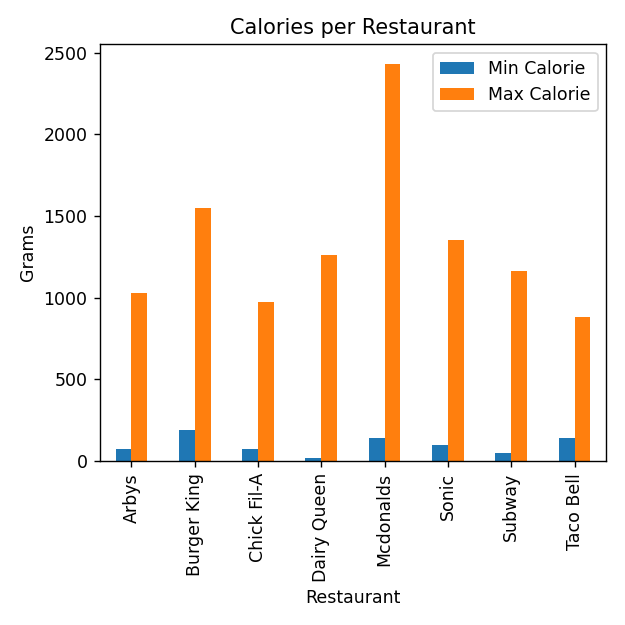

In [19]:
# Charting Min and Max Calories
# Set x axis and tick locations
x_axis = np.arange(len(cal_summary_df))
tick_locations = [value+0.4 for value in x_axis]

cal_summary_df.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Calories per Restaurant")
plt.ylabel("Grams")
plt.xlabel("Restaurant")

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


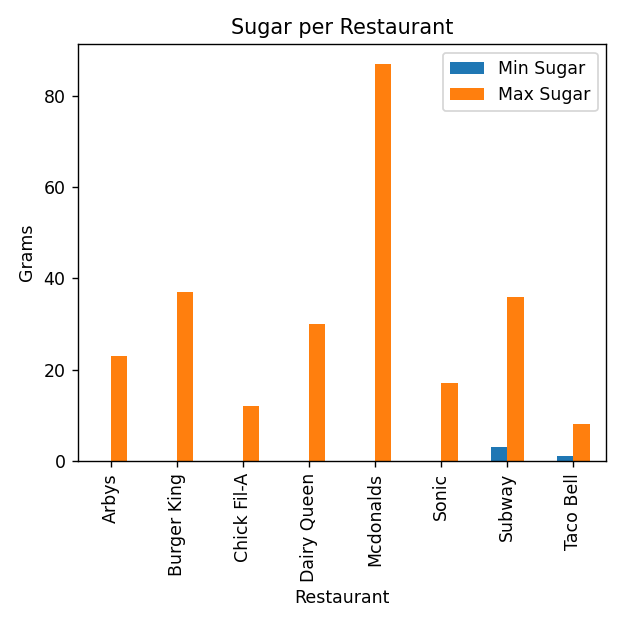

In [20]:
# Set up min & max sugar dataframe
min_sug1 = fast_food_df_sorted.groupby("restaurant")['sugar'].min()
max_sug2 = fast_food_df_sorted.groupby("restaurant")['sugar'].max()

# Place all of the data found into a summary DataFrame
sug_summary_df = pd.DataFrame({
                              "Min Sugar": min_sug1,
                              "Max Sugar": max_sug2})
sug_summary_df

# Charting Min and Max Sugar
# Set x axis and tick locations
x_axis = np.arange(len(sug_summary_df))
tick_locations = [value+0.4 for value in x_axis]

sug_summary_df.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Sugar per Restaurant")
plt.ylabel("Grams")
plt.xlabel("Restaurant")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


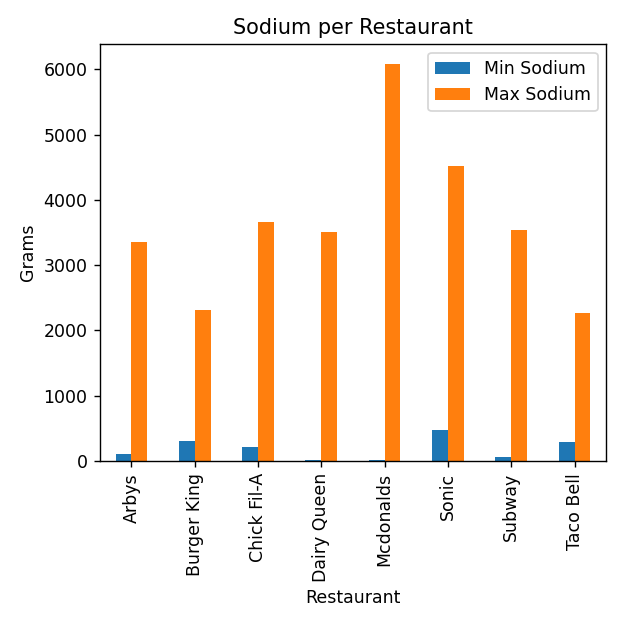

In [21]:
# Set up min & max Sodium dataframe
min_sod1 = fast_food_df_sorted.groupby("restaurant")['sodium'].min()
max_sod2 = fast_food_df_sorted.groupby("restaurant")['sodium'].max()

# Place all of the data found into a summary DataFrame
sod_summary_df = pd.DataFrame({
                              "Min Sodium": min_sod1,
                              "Max Sodium": max_sod2})
sod_summary_df

# Charting Min and Max Sodium
# Set x axis and tick locations
x_axis = np.arange(len(sod_summary_df))
tick_locations = [value+0.4 for value in x_axis]

sod_summary_df.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Sodium per Restaurant")
plt.ylabel("Grams")
plt.xlabel("Restaurant")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


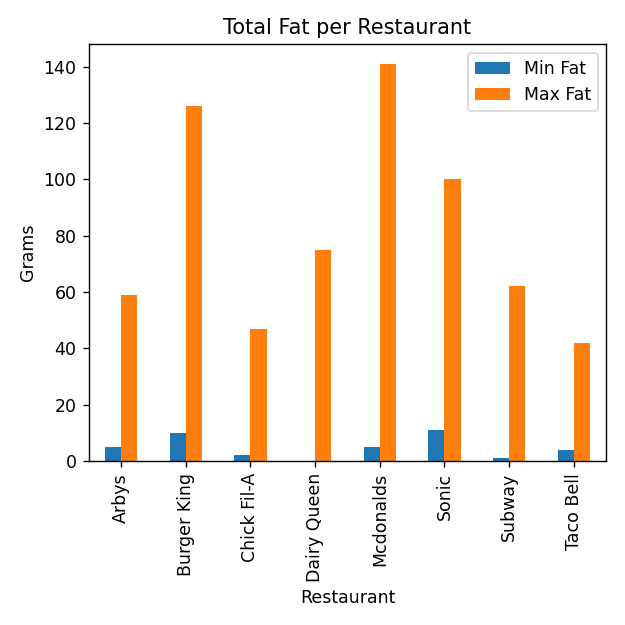

In [22]:
# Set up min & max Fat dataframe
min_fat1 = fast_food_df_sorted.groupby("restaurant")['total_fat'].min()
max_fat2 = fast_food_df_sorted.groupby("restaurant")['total_fat'].max()

# Place all of the data found into a summary DataFrame
fat_summary_df = pd.DataFrame({
                              "Min Fat": min_fat1,
                              "Max Fat": max_fat2})
fat_summary_df

# Charting Min and Max Sodium
# Set x axis and tick locations
x_axis = np.arange(len(fat_summary_df))
tick_locations = [value+0.4 for value in x_axis]

fat_summary_df.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Total Fat per Restaurant")
plt.ylabel("Grams")
plt.xlabel("Restaurant")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


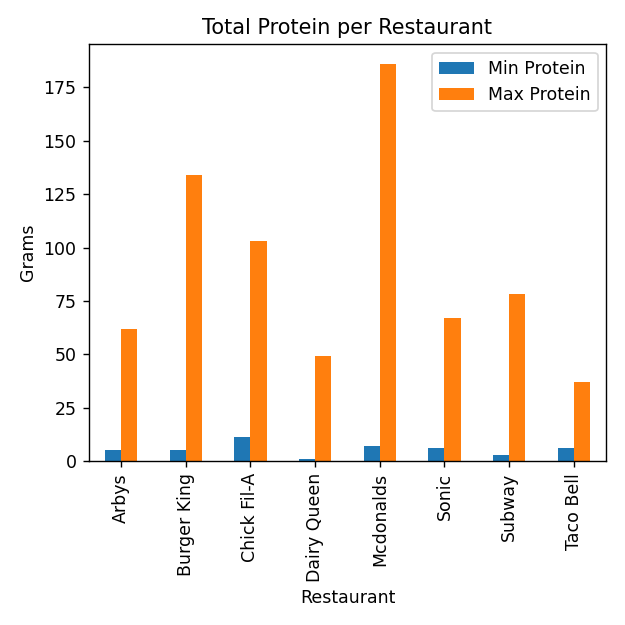

In [23]:
# Set up min & max protein dataframe
min_prot1 = fast_food_df_sorted.groupby("restaurant")['protein'].min()
max_prot2 = fast_food_df_sorted.groupby("restaurant")['protein'].max()

# Place all of the data found into a summary DataFrame
prot_summary_df = pd.DataFrame({
                              "Min Protein": min_prot1,
                              "Max Protein": max_prot2})
prot_summary_df

# Charting Min and Max Sodium
# Set x axis and tick locations
x_axis = np.arange(len(prot_summary_df))
tick_locations = [value+0.4 for value in x_axis]

prot_summary_df.plot(kind="bar", figsize=(5,5))

# Set a title for the chart
plt.title("Total Protein per Restaurant")
plt.ylabel("Grams")
plt.xlabel("Restaurant")

plt.show()
plt.tight_layout()

In [24]:
# Daily Values Data Set 

average_intake_df = pd.DataFrame({'sex': ['female','male'],
                                  'calories': [1800, 2267],
                                  'total_fat': [46, 56],
                                  'sat_fat': [180, 227],
                                  'cholesterol': [200, 200],
                                  'sodium': [2300, 2300],
                                  'total_carb': [130, 130],
                                  'fiber': [25.2, 30.8],
                                  'sugar': [24, 36],
                                  'protein': [46, 56]})

average_intake_df

,sex,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,female,1800,46,180,200,2300,130,25.2,24,46
1,male,2267,56,227,200,2300,130,30.8,36,56


In [50]:
# Sort categories into variables for scatterplot

fast_food_df_sorted
a = fast_food_df_sorted['total_fat']
b = fast_food_df_sorted['sugar']
c = fast_food_df_sorted['sodium']
d = fast_food_df_sorted['protein']

x = fast_food_df_sorted['calories']
r = fast_food_df_sorted['restaurant']
print(x)

0       380
1       840
2      1130
3       750
4       920
       ... 
506     780
507     580
508     780
509     720
510     720
Name: calories, Length: 511, dtype: int64


<IPython.core.display.Javascript object>


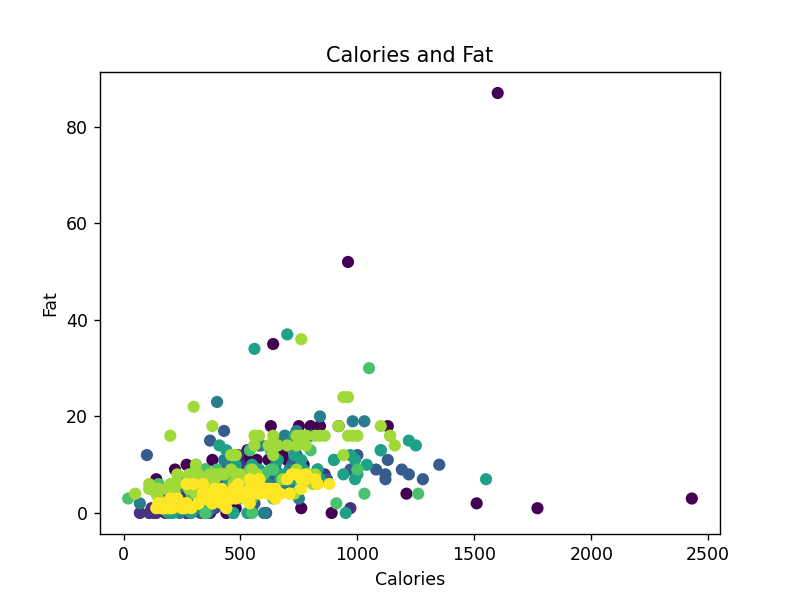

In [51]:
# Scatterplot - comparing calorie value to FAT (A) in grams
# Setting up 
a = fast_food_df_sorted['total_fat']
fig, ax = plt.subplots()
x_limit = 2500
y_limit = 150

plt.scatter(x, b, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Fat")
plt.xlabel("Calories")
plt.ylabel("Fat")

# Show the plot
plt.show()




<IPython.core.display.Javascript object>


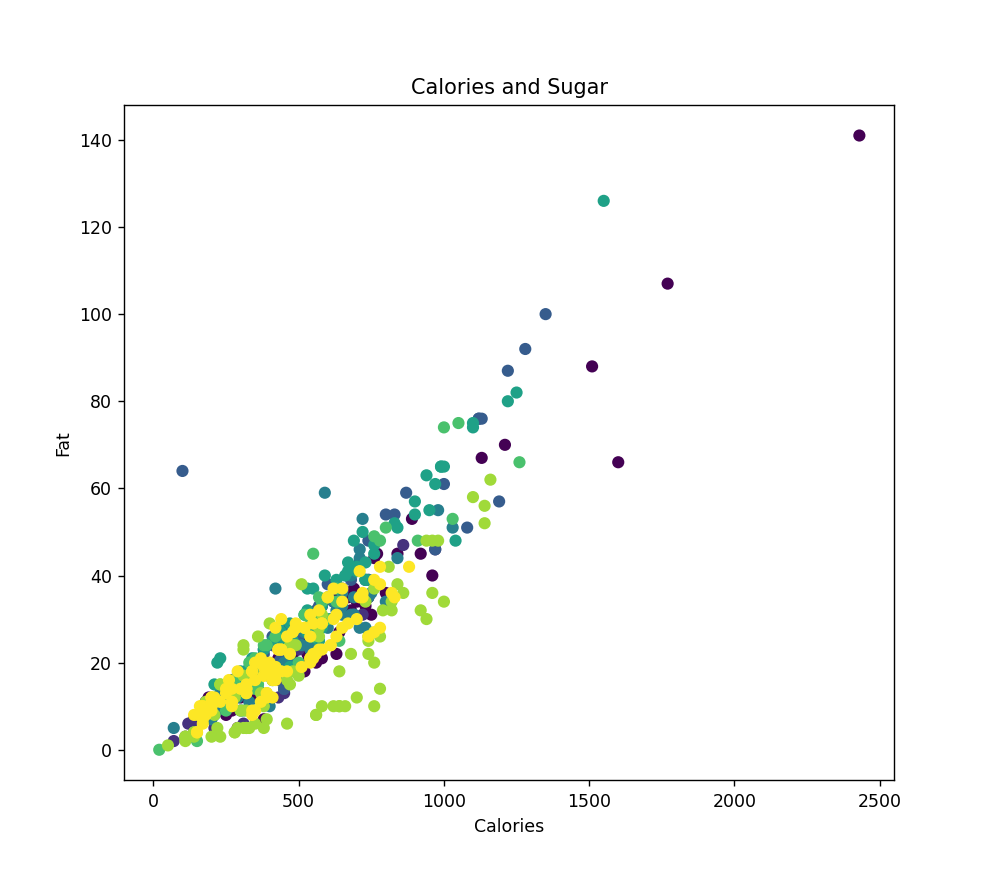

In [47]:
# Scatterplot - comparing calorie value to SUGAR(B) in grams
# Set up 
b = fast_food_df_sorted['sugar']
fig, ax = plt.subplots()
x_limit = 2500
y_limit = 90

plt.scatter(x, b, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Sugar")
plt.xlabel("Calories")
plt.ylabel("Sugar")

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


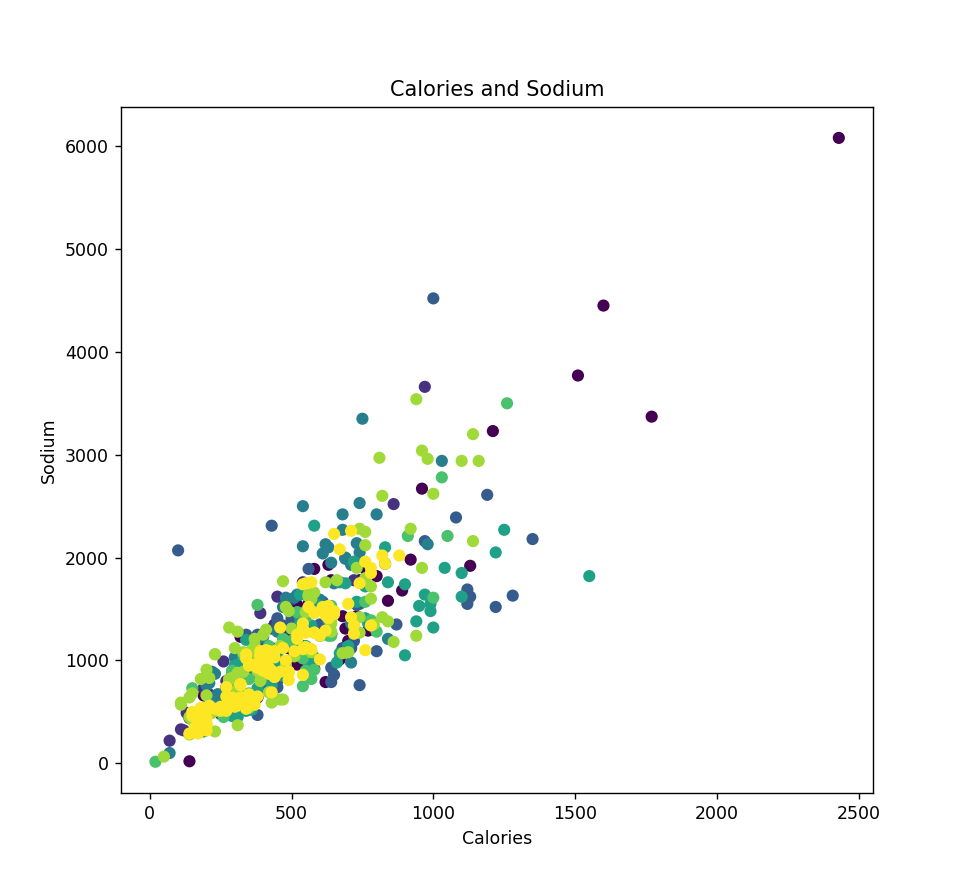

In [52]:
# Scatterplot - comparing calorie value to SODIUM(C) in grams
# Set up 
c = fast_food_df_sorted['sodium']
fig, ax = plt.subplots()
x_limit = 2500
y_limit = 6100

plt.scatter(x, c, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Sodium")
plt.xlabel("Calories")
plt.ylabel("Sodium")

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


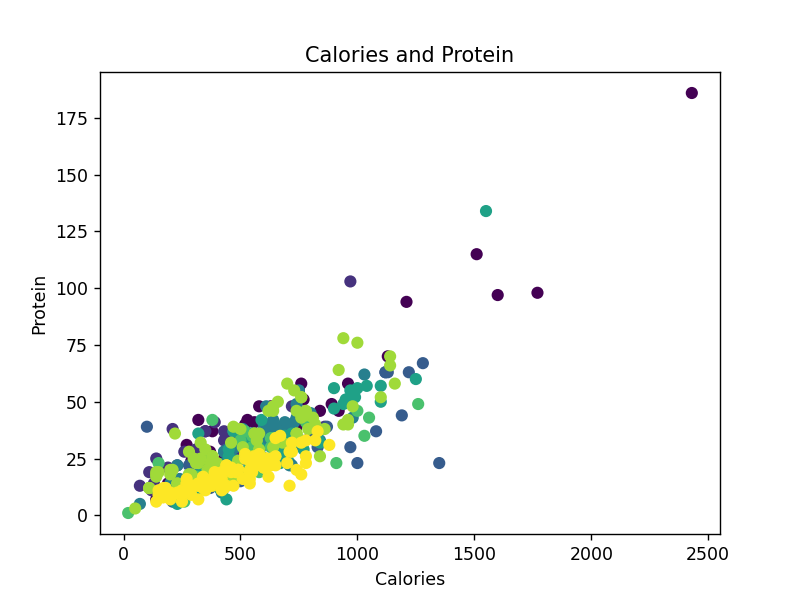

In [54]:
# Scatterplot - comparing calorie value to PROTEIN(C) in grams
# Set up 
d = fast_food_df_sorted['protein']
fig, ax = plt.subplots()
x_limit = 2500
y_limit = 190

plt.scatter(x, d, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Protein")
plt.xlabel("Calories")
plt.ylabel("Protein")

# Show the plot
plt.show()